In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv ('kindle_reviews.csv')
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [4]:
#to show the number of (row, column)
df.shape

(982619, 10)

In [5]:
#to know the column name
df.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [6]:
#read column
print(df[['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary']])

              asin helpful  overall  \
0       B000F83SZQ  [0, 0]        5   
1       B000F83SZQ  [2, 2]        4   
2       B000F83SZQ  [2, 2]        4   
3       B000F83SZQ  [1, 1]        5   
4       B000F83SZQ  [0, 1]        4   
...            ...     ...      ...   
982614  B00M13FNSS  [2, 2]        5   
982615  B00M13FNSS  [0, 0]        5   
982616  B00M13FNSS  [1, 1]        5   
982617  B00M13FNSS  [0, 0]        5   
982618  B00M13FNSS  [2, 2]        5   

                                               reviewText   reviewTime  \
0       I enjoy vintage books and movies so I enjoyed ...   05 5, 2014   
1       This book is a reissue of an old one; the auth...   01 6, 2014   
2       This was a fairly interesting read.  It had ol...   04 4, 2014   
3       I'd never read any of the Amy Brewster mysteri...  02 19, 2014   
4       If you like period pieces - clothing, lingo, y...  03 19, 2014   
...                                                   ...          ...   
982614  Yasss

In [7]:
#total column before drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982619 entries, 0 to 982618
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      982619 non-null  int64 
 1   asin            982619 non-null  object
 2   helpful         982619 non-null  object
 3   overall         982619 non-null  int64 
 4   reviewText      982597 non-null  object
 5   reviewTime      982619 non-null  object
 6   reviewerID      982619 non-null  object
 7   reviewerName    978797 non-null  object
 8   summary         982500 non-null  object
 9   unixReviewTime  982619 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 75.0+ MB


In [8]:
#checking the number of empty rows in the csv file
print(df.isnull().sum())

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3822
summary            119
unixReviewTime       0
dtype: int64


In [9]:
#drop unwanted column (Unnamed)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [10]:
#drop unwanted column (unixReviewTime)
df.drop('unixReviewTime', axis = 1, inplace = True)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery


In [11]:
#drop unwanted column (reviewerName)
df.drop('reviewerName', axis = 1, inplace = True)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,summary
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Nice vintage story
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,Different...
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,Oldie
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,I really liked it.
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Period Mystery


In [12]:
#rename columns
df.rename(columns={'asin':'ProductID', 'helpful':'Rating helpfulness', 'overall':'Rating', 'reviewText':'Review',
                  'reviewTime':'Date', 'reviewerID':'ReviewerID', 'summary':'Summary'}, inplace=True)
df.head()

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Nice vintage story
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,Different...
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,Oldie
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,I really liked it.
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Period Mystery


In [13]:
#total column after drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982619 entries, 0 to 982618
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ProductID           982619 non-null  object
 1   Rating helpfulness  982619 non-null  object
 2   Rating              982619 non-null  int64 
 3   Review              982597 non-null  object
 4   Date                982619 non-null  object
 5   ReviewerID          982619 non-null  object
 6   Summary             982500 non-null  object
dtypes: int64(1), object(6)
memory usage: 52.5+ MB


In [14]:
#considering only 50k rows
newdf=df.head(50000)

In [15]:
#new dataset info
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ProductID           50000 non-null  object
 1   Rating helpfulness  50000 non-null  object
 2   Rating              50000 non-null  int64 
 3   Review              49999 non-null  object
 4   Date                50000 non-null  object
 5   ReviewerID          50000 non-null  object
 6   Summary             49991 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [16]:
#save new dataset from the filtered of 50k data
newdf.to_excel('New Amazon Kindle Reviews.xlsx', index=False)

In [17]:
#describing data
newdf.describe()
newdf.sort_values('Rating', ascending=False)

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary
49995,B004PLNP2K,"[0, 0]",5,Anne Marie Novark has done it again. Book 3 in...,"05 27, 2013",A3P31Y2T3HBUS6,A Match Made In Texas
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Nice vintage story
49992,B004PLNP2K,"[0, 0]",5,The whole Diamondback Ranch series is well don...,"06 5, 2013",A2Q2BNNIIX0ZR3,Heartbreak and Heavy Breathing
49991,B004PLNP2K,"[0, 0]",5,This is book 3 in this series and what an awes...,"12 20, 2013",A3GLCV22X9S34N,A good read
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,I really liked it.
...,...,...,...,...,...,...,...
76,B000FDJ0FS,"[12, 13]",1,My Combination Online/Print version of the WSJ...,"09 14, 2010",A1AKKYXG0Y0ULL,Too Expensive
79,B000GFK7L6,"[6, 8]",1,i thought the n.y. times was a morning daily. ...,"11 3, 2009",A9FVWRHMM550F,what time do i get today's paper?
81,B000GFK7L6,"[1, 60]",1,The NYT is way over-rated. Just a few examples...,"09 16, 2009",A39N0BN4B2Q7F,Irresponsible jornalism and stale ideas
86,B000GFK7L6,"[0, 1]",1,I have not received one of my fourteen free co...,"02 9, 2014",A3BBW3E3I1QWU1,NONE RECEIVED


In [18]:
#show last 5 data
newdf.tail()

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary
49995,B004PLNP2K,"[0, 0]",5,Anne Marie Novark has done it again. Book 3 in...,"05 27, 2013",A3P31Y2T3HBUS6,A Match Made In Texas
49996,B004PLNP2K,"[0, 0]",4,This goes to show just how much hurt losing yo...,"05 17, 2013",A1CPJD87PMPJQJ,worth the time and money
49997,B004PLNP2K,"[0, 0]",4,Despite the physical beauty of Novark's charac...,"03 30, 2014",A1K1P8Y3LO20AZ,I'm a sucker for a sensitive handsome man
49998,B004PLNP2K,"[0, 0]",4,"I have enjoyed this series, and will continue ...","08 16, 2013",AK3MABTV8TK8M,Not the best in the series....
49999,B004PLNP2K,"[0, 0]",4,This book follows along similar guidelines as ...,"10 27, 2013",AI8JBNTZHEPZJ,A match Made In Texas


In [19]:
#rating range from 1-5
newdf['Rating'].value_counts()

Rating
5    23090
4    14980
3     7013
2     2832
1     2085
Name: count, dtype: int64

In [20]:
#filtering positive rating with (5 & 4)
posRate=newdf.loc[(newdf['Rating']==5)|(newdf['Rating']==4)]
posRate

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Nice vintage story
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,Different...
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,Oldie
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,I really liked it.
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Period Mystery
...,...,...,...,...,...,...,...
49995,B004PLNP2K,"[0, 0]",5,Anne Marie Novark has done it again. Book 3 in...,"05 27, 2013",A3P31Y2T3HBUS6,A Match Made In Texas
49996,B004PLNP2K,"[0, 0]",4,This goes to show just how much hurt losing yo...,"05 17, 2013",A1CPJD87PMPJQJ,worth the time and money
49997,B004PLNP2K,"[0, 0]",4,Despite the physical beauty of Novark's charac...,"03 30, 2014",A1K1P8Y3LO20AZ,I'm a sucker for a sensitive handsome man
49998,B004PLNP2K,"[0, 0]",4,"I have enjoyed this series, and will continue ...","08 16, 2013",AK3MABTV8TK8M,Not the best in the series....


In [21]:
#filtering negative rating with (2 & 1)
negRate=newdf.loc[(newdf['Rating']==2)|(newdf['Rating']==1)]
negRate

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary
21,B000FA64QO,"[0, 0]",2,"With Ylesia, a novella originally published in...","03 15, 2012",A3SZMGJMV0G16C,Minor New Jedi Order side story
39,B000FC1BN8,"[8, 9]",2,"For whatever reason, Star Wars short stories a...","09 24, 2010",AQZH7YTWQPOBE,"Too short, not enough story"
42,B000FC1BN8,"[0, 0]",2,"I admit it, I snapped this up the moment I saw...","01 17, 2013",A1YEPFLLH42OU1,An average short story
64,B000FDJ0FS,"[2, 9]",1,He had an english accent which he seemed tryin...,"12 10, 2013",A39N0BN4B2Q7F,In was thinking of getting until I heard the c...
65,B000FDJ0FS,"[2, 2]",1,Somewhat of a disappointment. The articles we...,"12 13, 2012",A2XGPSOJXTW5JF,Wall Street Journal
...,...,...,...,...,...,...,...
49892,B004PLNL2E,"[2, 9]",1,I'm not even sure where to begin my review of ...,"11 28, 2011",A2NKUKRAZ1VI4O,Terrible
49934,B004PLNNLS,"[10, 13]",2,The book at first start has interesting premis...,"12 31, 2012",A18D9K6PQLJUIR,Not the Hobbit---
49947,B004PLNNLS,"[8, 10]",2,"Starts very slowly, with overly detailed druge...","02 6, 2013",AAO0FHX90Y80A,okay but nothing special
49954,B004PLNNLS,"[4, 8]",2,This book is not what I expected and I couldn'...,"09 5, 2013",A257AVXGNQU2FI,Not What I Expected


In [22]:
#filtering neutral rating with (3)
neuRate=newdf.loc[newdf['Rating']==3]
neuRate

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary
12,B000FA64PA,"[0, 0]",3,Well written. Interesting to see Sideous (thro...,"12 31, 2013",A2QK1U70OJ74P,Not bad; it is well written
13,B000FA64PK,"[0, 0]",3,Troy Denning's novella Recovery was originally...,"03 15, 2012",A3SZMGJMV0G16C,Han and Leia reunited and Barabel Jedi introduced
17,B000FA64PK,"[4, 4]",3,"Another well written eBook by Troy Denning, bu...","04 16, 2009",A38Z3Q6DTDIH9J,Star Wars: The New Jedi Order: Recovery
25,B000FA64QO,"[0, 0]",3,"The events of ""Ylesia"" take place during ""Dest...","08 7, 2012",A22CW0ZHY3NJH8,One huge chapter
27,B000FBFMVG,"[5, 5]",3,Originally published as an e-book coinciding w...,"08 25, 2008",A3SZMGJMV0G16C,Short story featuring everyone's favorite Wookiee
...,...,...,...,...,...,...,...
49924,B004PLNNLS,"[22, 29]",3,I actually disagree with the reviewer who stru...,"06 21, 2011",A2AF1TZ3IKC6RM,An author with a lot of promise
49949,B004PLNNLS,"[5, 6]",3,"If you can take the slow-paced opening of ""The...","08 13, 2013",ADF700HECVH5G,Came mid-line on this
49952,B004PLNNLS,"[0, 0]",3,I enjoyed his other books. I found this book ...,"06 1, 2014",A39GA6RNJOFP53,Ok
49957,B004PLNNLS,"[52, 59]",3,"Before the critical comments, let me say I rea...","05 10, 2012",A17ETBG254GGV2,"""Sable City"" Review"


In [23]:
#the overall rating from the text
reviews=newdf[['Review','Rating']]
reviews.head()

,Review,Rating
0,I enjoy vintage books and movies so I enjoyed ...,5
1,This book is a reissue of an old one; the auth...,4
2,This was a fairly interesting read. It had ol...,4
3,I'd never read any of the Amy Brewster mysteri...,5
4,"If you like period pieces - clothing, lingo, y...",4


In [24]:
#count positive rating
len(posRate.index)

38070

In [25]:
#count negative rating
len(negRate.index)

4917

Text(-12.430555555555562, 0.5, 'Number\xa0of\xa0Responds')

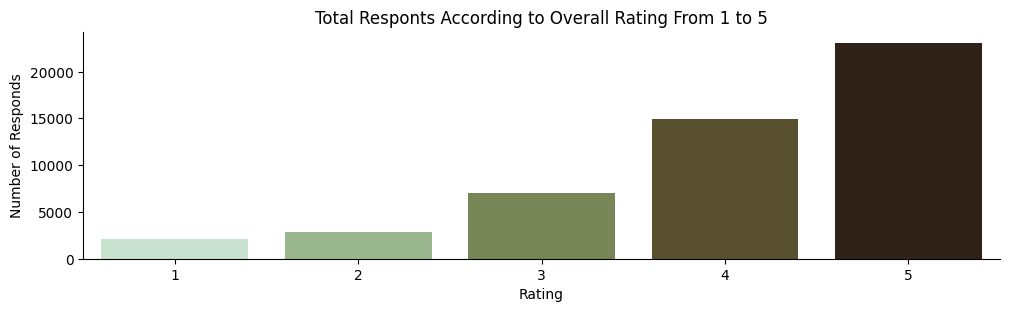

In [26]:
#shows the data rating
sns.catplot(x="Rating", kind="count", palette="ch:100", data=newdf, height=3, aspect=3.4)
plt.title("Total Responts According to Overall Rating From 1 to 5")
plt.xlabel("Rating")
plt.ylabel("Number of Responds")

In [27]:
#give reviews with rate > 3 a positive rating and reviews with rate < 3 a negative rating
def partition(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'

actualScore = newdf['Rating']
posneg = actualScore.map(partition)
newdf['Rating'] = posneg

newdf.head()

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary
0,B000F83SZQ,"[0, 0]",Positive,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Nice vintage story
1,B000F83SZQ,"[2, 2]",Positive,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,Different...
2,B000F83SZQ,"[2, 2]",Positive,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,Oldie
3,B000F83SZQ,"[1, 1]",Positive,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,I really liked it.
4,B000F83SZQ,"[0, 1]",Positive,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Period Mystery


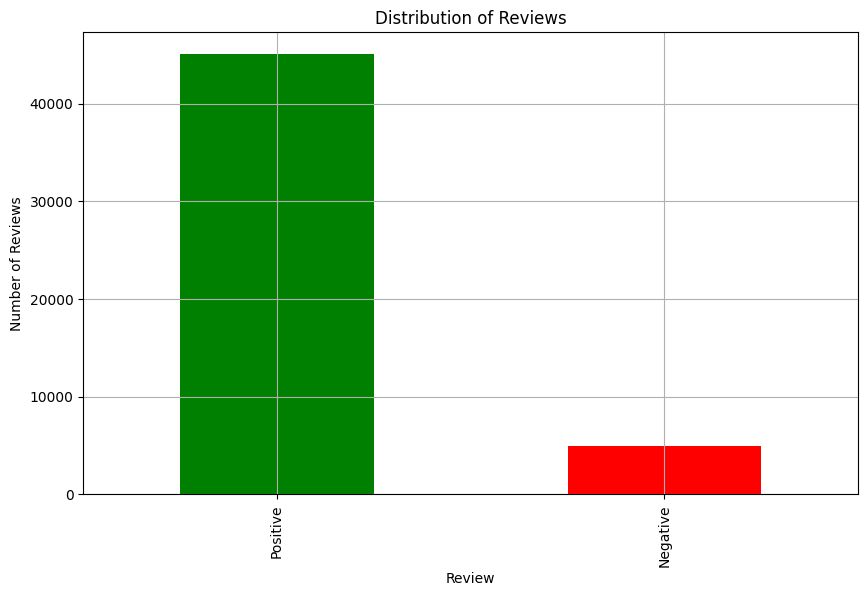

In [28]:
#considering the polarity of the Rating Positive (4&5) and Negative(2&1)
dist = newdf['Rating'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r']
dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Review")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Reviews")
plt.show()

In [29]:
#to show the view of the year
newdf.Date = pd.to_datetime(newdf.Date)
newdf['Year'] = newdf.Date.dt.year
newdf.head()

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary,Year
0,B000F83SZQ,"[0, 0]",Positive,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Nice vintage story,2014
1,B000F83SZQ,"[2, 2]",Positive,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,Different...,2014
2,B000F83SZQ,"[2, 2]",Positive,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,Oldie,2014
3,B000F83SZQ,"[1, 1]",Positive,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,I really liked it.,2014
4,B000F83SZQ,"[0, 1]",Positive,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Period Mystery,2014


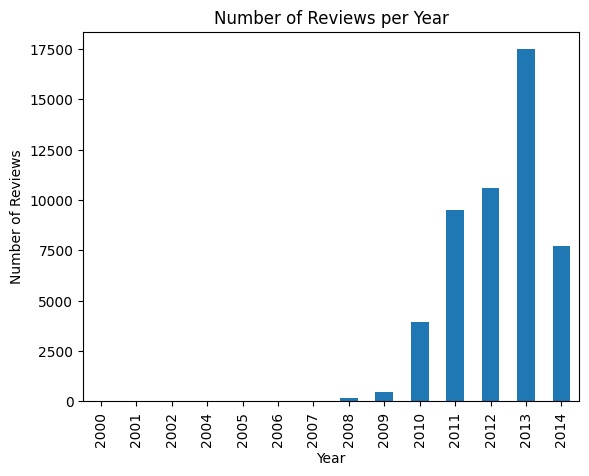

In [30]:
#number of review per year 
newdf.Year.value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

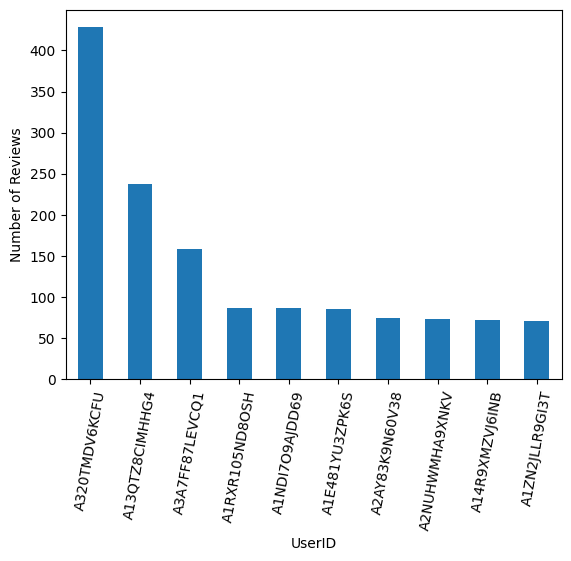

In [31]:
# To show number of review by user ID
newdf.ReviewerID.value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.xlabel('UserID')
plt.ylabel('Number of Reviews')
plt.show()

In [32]:
#to know the review for specific product
newdf[newdf['ProductID']=='B000FDJ0FS']

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary,Year
64,B000FDJ0FS,"[2, 9]",Negative,He had an english accent which he seemed tryin...,2013-12-10,A39N0BN4B2Q7F,In was thinking of getting until I heard the c...,2013
65,B000FDJ0FS,"[2, 2]",Negative,Somewhat of a disappointment. The articles we...,2012-12-13,A2XGPSOJXTW5JF,Wall Street Journal,2012
66,B000FDJ0FS,"[1, 1]",Negative,1. Costs more than delivered to your door pape...,2009-08-19,A1JZFGZEZVWQPY,Just Not Up To WSJ Standards,2009
67,B000FDJ0FS,"[49, 57]",Negative,"The WSJ for Kindle is overpriced, and the cust...",2008-02-26,A3775OP5VTX5ON,The WSJ Has Gone to Pot!,2008
68,B000FDJ0FS,"[2, 3]",Positive,Although WSJ has good reporting and covers all...,2012-11-20,A3AKG73AM4OKSI,high priced,2012
69,B000FDJ0FS,"[6, 7]",Positive,I've been an occasional reader of the Wall Str...,2012-03-03,A36K2N527TXXJN,"Convenient, Simply-formatted, Pricey",2012
70,B000FDJ0FS,"[10, 23]",Negative,"This is it, the big kahuna of financial newspa...",2008-02-24,ABXANRX4GPYRZ,OK but TOO restrictive,2008
71,B000FDJ0FS,"[3, 3]",Negative,I read nearly all my books and magazines on Ki...,2012-11-23,A3L25SHGZKH8Q1,Not quite a disaster,2012
72,B000FDJ0FS,"[5, 5]",Negative,This is an update of my original review...The ...,2010-10-01,AJNIKU4GSIWHY,"Kindle Edition is OK, online great, iPhone app...",2010
73,B000FDJ0FS,"[4, 5]",Negative,ten days into my trial subscription and i have...,2009-09-03,A1CWMO3LQQ7P0P,Big Disappointment,2009


In [33]:
#to know the review for specific product
newdf[newdf['ProductID']=='B000F83SZQ']

,ProductID,Rating helpfulness,Rating,Review,Date,ReviewerID,Summary,Year
0,B000F83SZQ,"[0, 0]",Positive,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Nice vintage story,2014
1,B000F83SZQ,"[2, 2]",Positive,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,Different...,2014
2,B000F83SZQ,"[2, 2]",Positive,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,Oldie,2014
3,B000F83SZQ,"[1, 1]",Positive,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,I really liked it.,2014
4,B000F83SZQ,"[0, 1]",Positive,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Period Mystery,2014
5,B000F83SZQ,"[0, 0]",Positive,A beautiful in-depth character description mak...,2014-05-26,A1RK2OCZDSGC6R,Review,2014
6,B000F83SZQ,"[0, 0]",Positive,I enjoyed this one tho I'm not sure why it's c...,2014-06-10,A2HSAKHC3IBRE6,Nice old fashioned story,2014
7,B000F83SZQ,"[1, 1]",Positive,Never heard of Amy Brewster. But I don't need ...,2014-03-22,A3DE6XGZ2EPADS,Enjoyable reading and reminding the old times,2014


In [34]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
reviews = newdf[['Review', 'Rating']]
reviews.head()

,Review,Rating
0,I enjoy vintage books and movies so I enjoyed ...,Positive
1,This book is a reissue of an old one; the auth...,Positive
2,This was a fairly interesting read. It had ol...,Positive
3,I'd never read any of the Amy Brewster mysteri...,Positive
4,"If you like period pieces - clothing, lingo, y...",Positive
